In [15]:
import sys
from loguru import logger

from src.amount import Amount
from src.entity import FinancialEntity
from src.assets import Stock, RealEstate, BankAccount
from src.loan import Loan
from src.cashflow import CashFlow
from src.balance import Balance
from src.budget import Income, Expense
from src.simulation import Simulation

In [16]:
logger.remove()
logger.add(
    sink=sys.stderr, 
    format="<green>{message}</green>"
)

3

In [17]:
%reload_ext autoreload
%autoreload 2

#### RealEstate

In [31]:
house = RealEstate(name='house', value=2000, cashdown=200, expected_annual_return=2, loan=Loan('house', 1800, 2, 20))

2023-11-14


In [33]:
house.calculate_equity('2104-10-10')

8259.003660442153

In [34]:
house.__dict__

{'name': 'house',
 'start_date': '2023-11-14',
 'end_date': '2999-12-31',
 'expected_monthly_return': 0.0016666666666666668,
 'value': 2000,
 'cashdown': 200,
 'loan': typing.Optional[src.loan.Loan],
 'monthly_expenses': {'loan': <src.loan.Loan at 0x12678c940>},
 'monthly_incomes': {}}

In [ ]:
#TODO: keep improving assets classe and balances.

#### Cashflow

In [4]:
cashflow = CashFlow()

# Income
cashflow.add_entity(Income('Salary_Lolo', Amount(5000, 7)))
cashflow.add_entity(Income('Salary_Simon', Amount(5000, 7)))

# Expenses
cashflow.add_entity(Expense('Transportation', Amount(300, 2)))
cashflow.add_entity(Expense('Rent', Amount(1200, 2)))
cashflow.add_entity(Expense('Travelling', Amount(1200, 2)))
cashflow.add_entity(Expense('Food', Amount(400, 2)))
cashflow.add_entity(Expense('Activity', Amount(400, 2)))

In [5]:
cashflow.inflows, cashflow.outflows

({'Salary_Lolo': <src.budget.Income at 0x117cae040>,
  'Salary_Simon': <src.budget.Income at 0x117c82b80>},
 {'Transportation': <src.budget.Expense at 0x117c82ac0>,
  'Rent': <src.budget.Expense at 0x117c82e80>,
  'Travelling': <src.budget.Expense at 0x117c82c10>,
  'Food': <src.budget.Expense at 0x11178b1c0>,
  'Activity': <src.budget.Expense at 0x1117b2fd0>})

In [6]:
cashflow.calculate_monthly_cash_flow('2024-10-10')

7040.113692989629

#### Simulation

In [7]:
simulation = Simulation(start_date='2024-11-01', duration=12, cashflow=cashflow)

In [8]:
simulation.run()

2024-11-01 cashflow $ 7096.01
2024-12-01 cashflow $ 7152.26
2025-01-01 cashflow $ 7208.85
2025-02-01 cashflow $ 7265.81
2025-03-01 cashflow $ 7323.12
2025-04-01 cashflow $ 7380.79
2025-05-01 cashflow $ 7438.82
2025-06-01 cashflow $ 7497.22
2025-07-01 cashflow $ 7555.98
2025-08-01 cashflow $ 7615.11
2025-09-01 cashflow $ 7674.61
2025-10-01 cashflow $ 7734.48


,cashflow
2024-11-01,7096.009243
2024-12-01,7152.255564
2025-01-01,7208.854743
2025-02-01,7265.808880
2025-03-01,7323.120088
2025-04-01,7380.790489
2025-05-01,7438.822222
2025-06-01,7497.217434
2025-07-01,7555.978290
2025-08-01,7615.106961


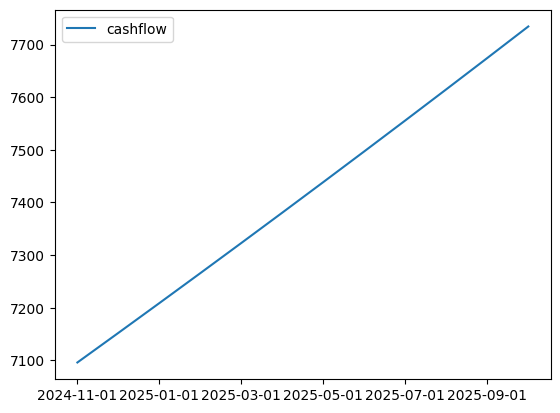

In [14]:
simulation.plot()

In [26]:
import glob

files = glob.glob('src/*.py')

In [27]:
# read file and concatenate the text
text = ''

for file in files:
    text += f'#### File Path: {file}\n ###'
    with open(file, 'r') as f:
        text += f.read() + '\n\n'

with open('Application.md', 'w') as f:
    f.write(text)